# Reviewing Amazon's Product Reviews

##### Cole Plum

### Problem
Amazon.com is the worlds largest online retailer.<sup>1</sup> Many people rely on product reviews before purchasing products, however there has been discussion over the validity of product reviews on Amazon.com. There have been reports of inaccurate reviews on Amazon.com, where false positive reviews are submitted or false upvotes on negative reviews have been cast. This analysis aims to consider these claims of deceptive reviews in the Amazon marketplace and look for various trends within Amazon product review data. 

### Problem Justification
Amazon.com is a household name that dominates the e-commerce space. Many users of Amazon's online shopping services rely on customer reviews on products that they are interested in. In fact, 20% of sales on Amazon.com are attributed to product reviews. Additionally, 1 out of 3 shoppers say that they will not purchase a product unless it has been positively reviewed.<sup>2</sup> <br><br>
However, these reviews are not always honest reviews from paying customers with real opinions. There are numerous instances of fake reviews and ratings on Amazon.com, which portray a false image of a product to the audience. One example may be the use of bots and workers at click farms to mark negative reviews on their competitors products as "helpful" in order to give those products a false portrayal of bad customer experiences.<sup>3</sup> This approach aims to turn customers away from similar products of a company's competitors in the hopes that those customers will purchase their product instead. 
<br><br>Another example that may give false positive portrayal is the fact that some sellers on Amazon pay others to leave good reviews on their Amazon products. This process is called "astroturfing". Astroturfing is defined as, "creating the impression of public support by paying people in the public to pretend to be supportive".<sup>4</sup> During this process, there are monetary incentives offered to those who submit a positive review on that sellers product, which results in numerous inaccurate and positive reviews on undeserving products. One particular study has found 23 Facebook groups that are solely a dedicated place for sellers to hire fake reviewers for their products. On average, these groups include about 16,000 members and 570 posts per day.<sup>5</sup> 
<br><br> These deceitful techniques by sellers to attempt to gain more business hurt those sellers who are trying to honestly compete in the Amazon e-commerce space. These tactics of covering up the truth about products not only hurt honest sellers by decreasing their sales, but they also negatively impact consumers. If customers purchase products based off of inaccurate product reviews, the product they receive may be of lesser quality of competing products. At this point, customers are buying goods based off of deceptive lies rather that truthful product descriptions. With so much reported corruption within the reviews section of Amazon.com, it may be helpful to analyze the data within these reviews to potentially identify patterns among the data. 

### Research Questions
- How are the star-ratings of products distributed? <br>
- Is there a relationship between how positive or negative a review is and how objective or subjective a review is? <br>
- Is there a difference in speech between verified and unverified reviews? <br>
- Does there appear to be a pattern across the time of year the review was posted?<br>
- Are verified and unverified reviews posted at the same rate/times of year?<br> 

### Question Justification
- Star ratings on Amazon serve as an apparently easy metric for customers to judge a product by. By providing knowledge about the star ratings of products and how they're distributed, then customers will be more informed on how to choose the best products for them. <br><br>
- By finding patterns between the level of objectivity and positivity ratings of a product review, we may be able to identify groups of reviews with different types. This can be done by observing the "sentiment" of reviews. The sentiment of a review can tell you two important characteristics of the speech used: the polarity (positive/negative tone behind the speech) and the subjectivity (how opinionated vs factual the speech is). <sup>6</sup> Prevalence of different groups representing different types of reviews may serve as an interesting basis for further questions of what could explain the groupings.  <br><br>
- Differences in speech between groups could help highlight some important information. Especially if those groups are verified and unverified reviews, differences within the speech of a review may highlight some differences between types of reviews and help lead to identifying which reviews and deceitful, fake ones. <br><br>
- Sharp spikes in a graph showing the number of reviews posted across time in a day and time in a year may seem unusual, especially for certain times in the day. For example, if there were many upvotes for a negative review late in the night, there should be some concern. It is unlikely that many legitimate reviewers submit reviews and ratings very late at night. In fact, a good indication of a fake review is said to be a short spurt of many similar reviews. <sup>7</sup> Therefore, unusual peaks may be helpful in determining how accuarate reviews are.<br><br>  
- Similar to observing the speech between verified and unverified reviews, it could also be helpful to observe the distribution of time when these different types of reviews are posted. If certain patterns are evident within this data, it may be possible to define certain characteristics for reviews that are false or possibly false. This can help legitimate sellers promote their products while preventing deceitful ones from gaining unfair advantages. 

### Datasets
The final dataset is composed of data that comes from numerous json files. There is no specific reason or meaning behind the categories chosen. The specific product categories analyzed include: 
- Arts, Crafts, and Sewing
- Digital Music
- Industrial and Scientific
- Luxury and Beauty
- Musical Instruments
- Amazon Prime Pantry
- Software
- Video Games<br>

You can access the complete csv files directly [**here**](https://drive.google.com/drive/folders/14HSh9GaeTKt1w_ulUqDAYZ-gUOnBdWB-?usp=sharing), or continue below to create the csv files from the json files yourself. 

The "products" csv file is a combination of [**json files**](http://deepyeti.ucsd.edu/jianmo/amazon/index.html) that describe general info about each Amazon product, such as title, brand, and ID number. <br>

The "reviews" csv file is a combination of [**json files**](https://nijianmo.github.io/amazon/index.html#complete-data) that provide information, such as time, product ID, and review text, for the provided Amazon products. 

This data comes from a research paper by Jianmo Ni, Jiacheng Li, Julian McAuley at the University of California, San Diego that aims to justify how certain recommendations apply to a user's interests. <sup>8</sup> 

#### Creating the CSV tables

In [1]:
#Import all the stuff here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy import mean
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
from datetime import datetime
import warnings

Read all of the necessary json files

In [2]:
crafts = pd.read_json('data/Arts_Crafts_and_Sewing_5.json', lines=True)
music = pd.read_json('data/Digital_Music_5.json', lines=True)
tools = pd.read_json('data/Industrial_and_Scientific_5.json', lines=True)
beauty = pd.read_json('data/Luxury_Beauty_5.json', lines=True)
instruments = pd.read_json('data/Musical_Instruments_5.json', lines=True)
pantry = pd.read_json('data/Prime_Pantry_5.json', lines=True)
software = pd.read_json('data/Software_5.json', lines=True)
games = pd.read_json('data/Video_Games_5.json', lines=True)

Remove the columns that we will definiely not need in our analysis

In [3]:
removeThis = ['reviewerID', 'style', 'reviewerName', 'image']
crafts = crafts.drop(removeThis, axis = 1)
music = music.drop(removeThis, axis = 1)
tools = tools.drop(removeThis, axis = 1)
beauty = beauty.drop(removeThis, axis = 1)
instruments = instruments.drop(removeThis, axis = 1)
pantry = pantry.drop(removeThis, axis = 1)
software = software.drop(removeThis, axis = 1)
games = games.drop(removeThis, axis = 1)

In [4]:
print(list(crafts.columns))
print(list(music.columns))
print(list(tools.columns))
print(list(beauty.columns))
print(list(instruments.columns))
print(list(pantry.columns))
print(list(software.columns))
print(list(games.columns))

['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'vote', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']


This columns of the "music" dataframe does not match the rest, which can cause problems when combining. Let's fix this. 

In [5]:
columns = music.columns.tolist()
columns.remove('vote')
columns.append('vote')
music = music[columns]

print(list(crafts.columns))
print(list(music.columns))
print(list(tools.columns))
print(list(beauty.columns))
print(list(instruments.columns))
print(list(pantry.columns))
print(list(software.columns))
print(list(games.columns))

['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']
['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'unixReviewTime', 'vote']


That looks much better!

In [6]:
reviews = pd.concat([crafts, music, tools, beauty, instruments, pantry, games, software]).reset_index(drop=True)
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote
0,4,True,"03 29, 2016",0449819906,Contains some interesting stitches.,Four Stars,1459209600,NaN
1,5,True,"08 12, 2015",0449819906,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration,1439337600,18
2,4,True,"04 5, 2015",0449819906,Great book but the index is terrible. Had to w...,"lots of great examples, good instructions, col...",1428192000,3
3,5,True,"10 11, 2014",0449819906,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman,1412985600,NaN
4,5,True,"05 8, 2014",0449819906,Very well laid out and very easy to read.\n\nT...,Very comprehensive,1399507200,NaN
...,...,...,...,...,...,...,...,...
1655172,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN
1655173,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN
1655174,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN
1655175,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN


This is what our data regarding the reviews of all of the products in our sample looks like now. Make sure to save your hard work. 

In [7]:
reviews.to_csv('data/reviews.csv', index = False)

Now, lets start creating our csv table for our products

In [8]:
pref = 'data/meta_'
m_crafts = pd.read_json(pref+'Arts_Crafts_and_Sewing.json', lines=True)
m_music = pd.read_json(pref+'Digital_Music.json', lines=True)
m_tools = pd.read_json(pref+'Industrial_and_Scientific.json', lines=True)
m_beauty = pd.read_json(pref+'Luxury_Beauty.json', lines=True)
m_instruments = pd.read_json(pref+'Musical_Instruments.json', lines=True)
m_pantry = pd.read_json(pref+'Prime_Pantry.json', lines=True)
m_software = pd.read_json(pref+'Software.json', lines=True)
m_games = pd.read_json(pref+'Video_Games.json', lines=True)

In [9]:
removeThis = ['category', 'tech1', 'fit', 'also_buy', 'image', 'tech2', 'feature', 'rank', 'also_view', 'details', 
              'main_cat', 'similar_item', 'date']
m_crafts = m_crafts.drop(removeThis, axis = 1)
m_music = m_music.drop(removeThis, axis = 1)
m_tools = m_tools.drop(removeThis, axis = 1)
m_beauty = m_beauty.drop(removeThis, axis = 1)
m_instruments = m_instruments.drop(removeThis, axis = 1)
m_pantry = m_pantry.drop(removeThis, axis = 1)
m_software = m_software.drop(removeThis, axis = 1)
m_games = m_games.drop(removeThis, axis = 1)

Again, lets remove the extra columns that we will not need and make sure the remaining columns line up for each category's dataframe. 

In [10]:
print(list(m_crafts.columns))
print(list(m_music.columns))
print(list(m_tools.columns))
print(list(m_beauty.columns))
print(list(m_instruments.columns))
print(list(m_pantry.columns))
print(list(m_software.columns))
print(list(m_games.columns))

['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']
['description', 'title', 'brand', 'price', 'asin']


All looks good, so nothing to change this time. Since this will essentially serve as a lookup table, we should drop any duplicate asin numbers. 

In [11]:
products = pd.concat([m_crafts, m_music, m_tools, m_beauty, m_instruments, m_pantry, m_software, m_games]).reset_index(drop=True)
products = products.drop_duplicates(subset=['asin']).reset_index(drop=True)

Again, be sure to save this data for later

In [12]:
products.to_csv('data/products.csv', index = False)

### Starting the Analysis

We need to make sure that every product in our review table has a corresponding entry in the product table. If a product has a review but not metadata in the product table, then we should remove it from our review table. 

In [13]:
pid = products['asin'].nunique()
rid = reviews['asin'].nunique()
print("Total ids in review table: ", rid)
print("Total ids in product table: ", pid)
print("There are many more metadata entries than there are for products reviewed which is good\n")

check = reviews['asin'].isin(list(products['asin']))
print("Total reviews entries: ", len(check))
print("Products reviewed with product metadata: ", len(check[check == True]))
print( len(check) - len(check[check == True]) , "entries do not have metadata provided, so we should remove them")

Total ids in review table:  75443
Total ids in product table:  762688
There are many more metadata entries than there are for products reviewed which is good

Total reviews entries:  1655177
Products reviewed with product metadata:  1484200
170977 entries do not have metadata provided, so we should remove them


In [14]:
#Every review id that has product metadata
includes = list(reviews['asin'][check == True].unique())

reviews = reviews[reviews['asin'].isin(includes)]
reviews = reviews.reset_index(drop = True)
reviews

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN
2,5,True,"01 19, 2017",8862933177,Bought as a gift for my mom...she loves it!,Great recipe book,1484784000,NaN
3,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN
4,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN
...,...,...,...,...,...,...,...,...
1484195,4,False,"07 16, 2016",B01FFVDY9M,When I ordered this it was listed as Photo Edi...,File Management Software with Basic Editing Ca...,1468627200,NaN
1484196,3,False,"06 17, 2017",B01HAP3NUG,This software has SO much going on. Theres a ...,"Might not be for the ""novice""",1497657600,NaN
1484197,4,False,"01 24, 2017",B01HAP3NUG,I have used both more complex and less complex...,"Great, Inexpensive Software for Those Who Have...",1485216000,NaN
1484198,3,False,"06 14, 2018",B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,Gets the job done ... but not as easy as it sh...,1528934400,NaN


Now all of the data in our reviews table will have corresponding data in the products table

#### How are the star-ratings of products distributed?

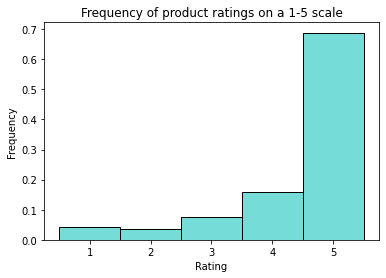

Percentage of 5-star reviews:  0.69
count    1484200.00
mean           4.42
std            1.05
min            1.00
25%            4.00
50%            5.00
75%            5.00
max            5.00
dtype: float64


In [15]:
stars = list(reviews['overall'])
sns.histplot(stars, bins = [.5,1.5,2.5,3.5,4.5,5.5], stat="probability", color='mediumturquoise')
plt.title("Frequency of product ratings on a 1-5 scale")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
print("Percentage of 5-star reviews: ", round(reviews['overall'][reviews['overall'] == 5].count()/len(reviews),2))
print(pd.Series(stars).describe().apply(lambda x: round(x, 2)))

We can use this information to answer our first question. The distribution of star-ratings of products from our sample on Amazon is left skewed. It appears as though about 69% of the almost 1.5 million reviews have awarded a product a 5-star rating. The average rating a product has received is 4.42 stars which is a rather high rating. It appears as though only about 15% of reviews have given less than 4 stars. 

### Is there a relationship between how positive or negative a review is and how objective or subjective a review is? 

Let's start by going through the text of each review and assigning it a polarity and subjectivity rating

In [16]:
blobs = reviews['reviewText'].apply(lambda x: TextBlob(str(x)))
pol = []
sub = []
blobs.apply(lambda x: pol.append(x.sentiment.polarity))
blobs.apply(lambda x: sub.append(x.sentiment.subjectivity))

0          None
1          None
2          None
3          None
4          None
           ... 
1484195    None
1484196    None
1484197    None
1484198    None
1484199    None
Name: reviewText, Length: 1484200, dtype: object

In [17]:
reviews['polarity'] = pol
reviews['subjectivity'] = sub
reviews.head(5)

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote,polarity,subjectivity
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5,0.637245,0.740816
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN,0.197073,0.429415
2,5,True,"01 19, 2017",8862933177,Bought as a gift for my mom...she loves it!,Great recipe book,1484784000,NaN,0.000000,0.000000
3,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN,0.262500,0.565000
4,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN,0.211538,0.434615


TextBlob is not completely accurate and tends to assign exact -1, 0, and 1 values in unnecessary situations. We should remove reviews that yield such results. 

In [18]:
temp = reviews[reviews['polarity'] > -1]
reviews = temp[temp['polarity'] < 1]
temp = reviews[reviews['subjectivity'] > 0]
reviews = temp[temp['subjectivity'] < 1]
reviews.head(5)

,overall,verified,reviewTime,asin,reviewText,summary,unixReviewTime,vote,polarity,subjectivity
0,5,True,"02 25, 2010",8862933177,I purchased this Recipe Journal for a friend w...,Cool place to Catalog Your Recipes,1267056000,5,0.637245,0.740816
1,5,True,"02 15, 2017",8862933177,I bought this to have my daughter's grandmothe...,It seems like it'll work good for the purpose,1487116800,NaN,0.197073,0.429415
3,5,True,"02 18, 2016",8862933177,I love this journal i am able to write up my f...,Love it.,1455753600,NaN,0.262500,0.565000
4,5,True,"11 12, 2014",8862933177,Love this journal. I keep recipes on loose pa...,Love this journal,1415750400,NaN,0.211538,0.434615
5,4,False,"12 10, 2013",8862933177,I've been using this as my primary recipe jour...,My primary recipe journal!,1386633600,NaN,0.148639,0.407681


#### Let's explore our data a little bit

In [19]:
most_pos = reviews[reviews['polarity'] == reviews['polarity'].max()]
asin = list(most_pos['asin'])[0]
prod = list(products[products['asin'] == asin]['title'])[0]
brand = list(products[products['asin'] == asin]['brand'])[0]
print('Product: ', prod, '\n')
print('Brand: ', brand, '\n')
print("Review: ", list(most_pos['reviewText'])[0], '\n')
print('Polarity rating: ', round(list(most_pos['polarity'])[0], 4), '\n')

Product:  LyxPro Balanced XLR Cable 3 ft Premium Series Professional Microphone Cable, Powered Speakers and Other Pro Devices Cable, Black 

Brand:  LyxPro 

Review:  Excellent product, very fast delivery !! Five Stars !!!! 

Polarity rating:  0.9959 



We just found the product that has a review scoring the highest polarity rating, which makes sense after looking at its great review. What does the most objective review look like? 

In [20]:
most_obj = reviews[reviews['subjectivity'] == reviews['subjectivity'].min()]
asin = list(most_obj['asin'])[0]
prod = list(products[products['asin'] == asin]['title'])[0]
brand = list(products[products['asin'] == asin]['brand'])[0]
print('Product: ', prod, '\n')
print('Brand: ', brand, '\n')
print("Review: ", list(most_obj['reviewText'])[0], '\n')
print('Subjectivity rating: ', round(list(most_obj['subjectivity'])[0], 4), '\n')

Product:  Logitech G502 Proteus Spectrum RGB Tunable Gaming Mouse, 12,000 DPI On-The-Fly DPI Shifting, Personalized Weight and Balance Tuning with (5) 3.6g Weights, 11 Programmable Buttons 

Brand:  Logitech 

Review:  In Windows 10, the Logitech driver hasn't been digitally signed by Microsoft yet, therefore it creates an alert flag in the Device Manager under the  name... Logitech Gaming Virtual Bus Enumerator.  This is caused when memory integrity checking setting is turned on in the Core Isolation section of Device Security.  It causes a severe issue where my computer stopped responding and I had to manually restart it several times.  To correct the problem, turn off memory integrity and the issue resolved. The error message displayed in Device Manager is: "Windows cannot load the device driver for this hardware. The driver may be corrupted or missing. (Code 39)."
Driver details... Driver Name: oem27.inf,  Provider: Logitech, Date: 6/13/16, Version: 8.85.75.0, Digital Signer: Micro

This is interesting too. By finding the review with the loweset subjectivity rating, we were able to find which product had the most objective review. After reading the review for ourselves, it makes sense because of how descriptive and factual the review is. Next, let's observe the distribution of our variables. 

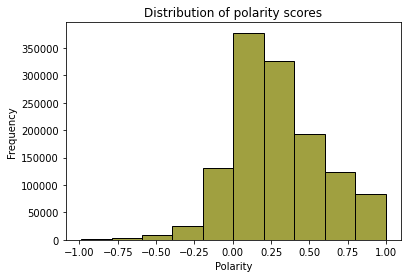

p-value:  0.0


In [21]:
warnings.filterwarnings('ignore')
sns.histplot(reviews['polarity'], bins=10, color='olive')
plt.title("Distribution of polarity scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

test_stat, p_val = stats.shapiro([reviews['polarity']])
print("p-value: ", str(p_val))

Our p-value is 0.0, which may be inaccurate because of how much data we have. Our data looks approximately normal, and we have over 1 million datapoints, so we may be able to use parametric statistical tests if the subjectivity scores tell a similar story.

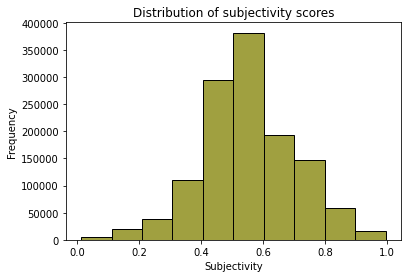

p-value:  0.0


In [22]:
sns.histplot(reviews['subjectivity'], bins=10, color='olive')
plt.title("Distribution of subjectivity scores")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

test_stat, p_val = stats.shapiro([reviews['subjectivity']])
print("p-value: ", str(p_val))

Again, our p-value is 0.0, which may be inaccurate because of how much data we have. Our data looks approximately normal, and we have over 1 million datapoints, so we still use parametric statistical tests. 

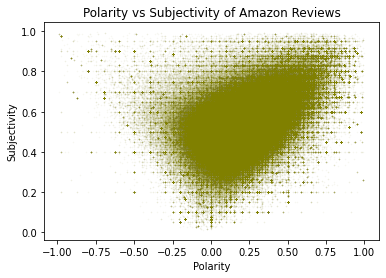

In [23]:
plt.scatter(x=reviews['polarity'], y=reviews['subjectivity'], s=.3, alpha=.05, color='olive')
plt.title("Polarity vs Subjectivity of Amazon Reviews")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

Upon glancing at the data, it appears as though there is a positive correlation between polarity and subjectivity of a review. Let's perform a statistical test to explore this farther. 

In [32]:
#Finding Pearson Correlation Coefficient
corr, p_value = stats.pearsonr(reviews['polarity'], reviews['subjectivity'])
print(round(corr,2), " : " , p_value)

0.49  :  0.0


The Pearson Correlation Coefficient is .49, showing a rather strong positive relationship between the polarity and subjectivity of an Amazon product review. The p-value is extremely small, thus it is very unlikely that a correlation coefficient produced would be this strong if there was no correlation between polarity and subjectivity.

This suggests that, in general, Amazon reviews with higher polarity ratings also have higher subjectivity ratings. In more coloquial terms, reviews that are more positive in nature tend to also be more opinionated. However, even though we did find this general trend in the data, an interesting attribute of the scatterplot is how a "V" shape is created, where the points is at a polarity of 0. In other words, the more emotional a review is (either positive or negative), the more opinionated it tends to be. 

#### Is there a difference in speech between verified and unverified reviews?

First, lets look at out data to see how much of the reviews are verified

In [71]:
v = len(reviews[reviews['verified'] == True])
nv = len(reviews[reviews['verified'] == False])
v_p = round(100*round(len(reviews[reviews['verified'] == True])/len(reviews), 2))
nv_p = round(100*round(len(reviews[reviews['verified'] == False])/len(reviews), 2))

print(str(v) + ' verified (' + str(v_p) + '%)')
print(str(nv) + ' unverified (' + str(nv_p) + '%)')


1010759 verified (80%)
259270 unverified (20%)


Lets try plotting the same scatterplot, but grouping the verified and unverified reviews, where yellow points are verified and brown points are unverified

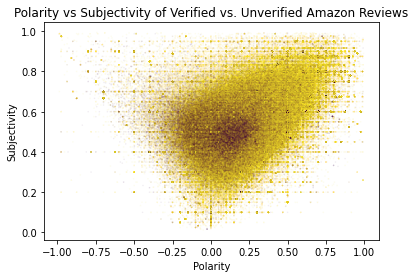

In [25]:
plt.scatter(reviews['polarity'], reviews['subjectivity'], s=.5, alpha=.05, c=reviews['verified'])
plt.title('Polarity vs Subjectivity of Verified vs. Unverified Amazon Reviews')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

Looking at the scatterplot color-coded by verified status, it seems that there may be a difference between the two groups of data. Let's plot the two groups separately and compare again. 

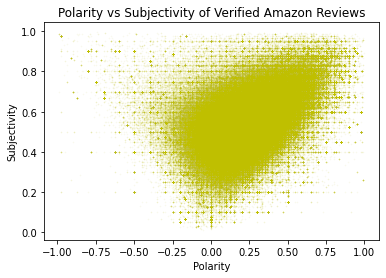

In [26]:
plt.scatter(reviews['polarity'][reviews['verified'] == True], reviews['subjectivity'][reviews['verified'] == True], s=.5, alpha=.05, color='y')
plt.title('Polarity vs Subjectivity of Verified Amazon Reviews')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

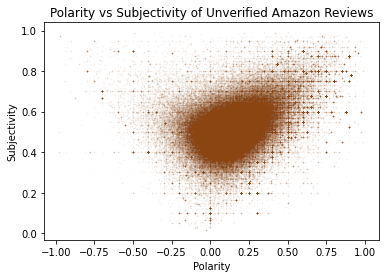

In [27]:
plt.scatter(reviews['polarity'][reviews['verified'] == False], reviews['subjectivity'][reviews['verified'] == False], s=.5, alpha=.05, color='saddlebrown')
plt.title('Polarity vs Subjectivity of Unverified Amazon Reviews')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

After looking at the separate plots, verified and unverified reviews look pretty similar regarding their polarity and subjectivity ratings. Let's perform a MANOVA test to test whether there is a significant difference between both groups of data regarding their polarity and subjectivity. 

Before we perform a test, lets confirm that the standard deviations of both of our variables are between .5 and 2 in order to perform a MANOVA test

In [28]:
print(np.std(reviews['polarity'][reviews['verified'] == False])/np.std(reviews['polarity'][reviews['verified'] == True]))
print(np.std(reviews['subjectivity'][reviews['verified'] == False])/np.std(reviews['subjectivity'][reviews['verified'] == True]))

0.757532391197502
0.7186673006057979


In [29]:
maov = MANOVA.from_formula('polarity + subjectivity ~ verified', data=reviews)
print(maov.mv_test())

                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF      F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda 0.2583 2.0000 1270026.0000 1823656.0056 0.0000
         Pillai's trace 0.7417 2.0000 1270026.0000 1823656.0056 0.0000
 Hotelling-Lawley trace 2.8718 2.0000 1270026.0000 1823656.0056 0.0000
    Roy's greatest root 2.8718 2.0000 1270026.0000 1823656.0056 0.0000
----------------------------------------------------------------------
                                                                      
----------------------------------------------------------------------
          verified        Value  Num DF    Den DF     F Value   Pr > F
----------------------------------------------------------------------
            Wilks' lambda 0.9

By looking at the far right row within the "verified" section of the table, we can find that the p-value is 0, which is less than .05. This means that we are able to reject the null hypothesis, which stated that there is no difference between the means of verified and unverified reviews. Therefore, we found that there does appear to be a statistically significant difference between the means of verified vs. unverified reviews.

#### Does there appear to be a pattern across the time of year the review was posted?

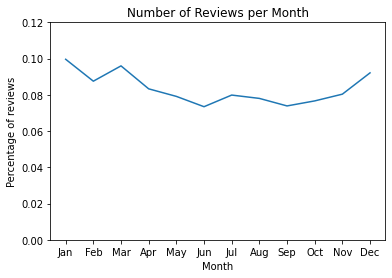

In [44]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
times = reviews['reviewTime']
length = len(times)
times = times.apply(lambda x: x.split()[0])
times = times.value_counts().sort_index().apply(lambda x: x/length)

sns.lineplot(x = months, y = times)
plt.title("Number of Reviews per Month")
plt.xlabel('Month')
plt.ylabel('Percentage of reviews')
plt.ylim([0, .12])
plt.show()

The trend in data shows that Amazon reviews are not posted an even amount of time across the year. Our lineplot suggests that the majority of reviews are posted in the winter months, and the number of reviews posted per month begin to drop after this. This is an interesting aspect to start questioning. Why is this the case? Does it have to do with the holiday season and the number of products that are ordered at that time? 

#### Are verified and unverified reviews posted at the same rate/times of year?

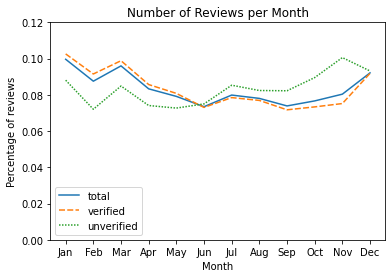

In [45]:
times = reviews['reviewTime']
times_v = reviews['reviewTime'][reviews['verified'] == True]
times_nv = reviews['reviewTime'][reviews['verified'] == False]

times = times.apply(lambda x: x.split()[0])
times_v = times_v.apply(lambda x: x.split()[0])
times_nv = times_nv.apply(lambda x: x.split()[0])

times = times.value_counts().sort_index()
times_v = times_v.value_counts().sort_index()
times_nv = times_nv.value_counts().sort_index()

times = list(times.apply(lambda x: x/len(reviews)))
times_v = list(times_v.apply(lambda x: x/len(reviews[reviews['verified'] == True])))
times_nv = list(times_nv.apply(lambda x: x/len(reviews[reviews['verified'] == False])))

data2 = pd.DataFrame()
data2['total'] = times
data2['verified'] =times_v
data2['unverified'] = times_nv

sns.lineplot(data=data2)
plt.title("Number of Reviews per Month")
plt.xlabel('Month')
plt.ylabel('Percentage of reviews')
plt.ylim([0, .12])
plt.xticks(range(0,12), months)
plt.show()

This graph shows what proportion of reviews were posted that month across the whole year. We can see that the verified and total lines are very similar. This means that for each month, about the same proportion of verified reviews are posted as are reviews posted in general. This is less true for unverified posts. Up until May, less unverified posts are posted relative to the total number of reviews posted, however the contrary becomes true after May. 

### Conclusion

- How is are the star-ratings of products distributed? <br><br>
    - The distribution of star-ratings of products from our sample on Amazon is left skewed. It appears as though about 69% of the almost 1.5 million reviews have awarded a product a 5-star rating, whereas less than 10% of the reviews have a 1 or 2 star rating. The average rating a product has received is 4.42 stars which is a rather high rating. It appears as though only about 15% of reviews have given less than 4 stars. <br><br>
- Is there a relationship between how positive or negative a review is and how objective or subjective a review is? <br><br>
    - We  found a Pearson Correlation Coefficient of .49, showing a rather strong positive relationship between the polarity and subjectivity of an Amazon product review. The p-value is extremely small, thus it is very unlikely that a correlation coefficient produced would be this strong if there was no correlation between polarity and subjectivity. This suggests that, in general, Amazon reviews with higher polarity ratings also have higher subjectivity ratings. In more coloquial terms, reviews that are more positive in nature tend to also be more opinionated. However, even though we did find this general trend in the data, an interesting attribute of the scatterplot is how a "V" shape is created, where the points is at a polarity of 0. In other words, the more emotional a review is (either positive or negative), the more opinionated it tends to be. <br><br>
- Is there a difference in speech between verified and unverified reviews? <br><br>
    - We found that there **does** appear to be a statistically significant difference between the means of verified vs. unverified reviews. If the Amazon "verified" metric is to be trusted, then this conclusion may lead to being able to better identify possible false and deceitful reviews. However, there are no clear clusers within the scatterplot, making it more difficult to try and identify whether a given review will belong to the verified or unverified group based in the speech within the review. <br><br>
- Does there appear to be a pattern across the time of year the review was posted?<br><br>
    - The trend in data shows that Amazon reviews are not posted an even amount of time across the year. The graph suggests that the majority of reviews are posted in the winter months, and the number of reviews posted per month begin to drop after this. This peak could possibly be a result of holiday shopping, however there could be other explanations as well. Perhaps more people are inside during the winter on their computer and decide to write fake reviews in exchange for compensation. This questions is one that could be interesting if studied further. <br><br>
- Are verified and unverified reviews posted at the same rate/times of year?<br><br>
     - We found that for each month, about the same proportion of verified reviews are posted as total reviews posted in general. This is less true for unverified posts. Unverified to not follow the rate of reviews being posted as closely. Up until May, less unverified posts are posted relative to the total number of reviews posted, however the contrary becomes true after May. Unverified reviews begin to be posted at a higher rate than reviews in general at this point, which is another good place for investigation into what the reason is. 

### Ethical Concerns

There are some major ethical concerns when dealing with the problem of fake reviews for products on Amazon. One of the stakeholders in this situation is the competition of said companies. When a seller has a very large amount of positive reviews, the seller appears as though they are a seller with great products. This takes business away from legitimate businesses, that are earning good reviews for themselves without any outside help. This results in a greatly unfair business model for legitimate sellers on Amazon. <sup>2</sup> Additionally, those sellers that are earning fake reviews may be interested in the fact that there appears to be a difference in the speech characteristics of verified and unverified reviews. It is likely that the deceitful reviews are unverified, so extra attention may be made to try and match the polarity and subjectivity characteristics of verified reviews. A similar concept may apply to the time of year these unverified reviews are posted. Special attention may now be put towards matching the proportion of verified reviews being posted in order to become more similar to those verified reviews. 
<br><br> This leads to the next stakeholder: the customers. When customers shop on Amazon, many of them will tend to buy the products with many high ratings. However, the products with the most best reviews did not rightfully earn their good reviews, while legitimately good products will not gain as much attention. Therefore, the customers will likely order a product with lower quality than the better product of the competing company because of the reviews. Customers may be interested in the data presented since they are a direct consumer. For example, if customers are aware of the distribution of star ratings across amazon products, they say feel that it is necessary to look beyond a simple 5 star rating product before purchasing a product. Similarly, this realization by customers may lead them to investigate the product farther and take their business somewhere else, which is unwanted by those defeitful Amazon sellers. 
<br><br> Lastly, Amazon itself is a huge stakeholder. Due to these false reviews, Amazon loses sellers. The legitimate sellers can either no longer compete or simply to not want to compete with those sellers with inaccurate reviews. This applies to both small sellers, such as personal shops, and big sellers, such as Nike. Since these sellers to not want to sell in the Amazon marketplace anymore, Amazon loses quality customers. <sup>2</sup> Therefore, Amazon may view the results as motivation to restrict deceitful activity within reviews of products. This may reduce the chance of sellers leaving the Amazon marketplace, which is good for Amazon. 

### Citations
- https://whatis.techtarget.com/definition/Amazon
- https://www.usatoday.com/story/tech/news/2017/03/20/review-you-wrote-amazon-priceless/99332602/
- https://www.cnbc.com/2020/09/06/amazon-reviews-thousands-are-fake-heres-how-to-spot-them.html
- https://www.huffpost.com/entry/are-online-reviews-reliab_b_10153912
- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3664992
- https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/
- https://www.nytimes.com/wirecutter/blog/lets-talk-about-amazon-reviews/
- http://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf